# Time Series Visualization

You can easily create figures of time series plots from geosnap `Community` objects using the `tsplot` class method. `tsplot` uses `proplot`, a lightweigth `matplotlib` wrapper with its own feature set.

In [1]:
from geosnap import Community
import contextily as ctx
%matplotlib inline

Loading manifest: 100%|██████████| 5/5 [00:00<00:00, 9300.01entries/s]


In [2]:
#create a community object from Riverside MSA LODES data with multiple years
rv = Community.from_lodes(msa_fips='40140', years=[2014,2015,2016,2017])

/home/andrew/Projects/geosnap/geosnap/_data.py:242: UserWarning: Unable to locate local census 2010 block data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the io.store_blocks_2010 function for better performance
  "Unable to locate local census 2010 block data. Streaming instead.\n"
Loading manifest: 100%|██████████| 52/52 [00:00<00:00, 7133.64entries/s]
/home/andrew/anaconda3/envs/geosnap/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


The easiest way to use `tsplot` is to just provide the column you would like to graph.

SubplotsContainer([CartesianAxesSubplot(0.0266028,0.371722;0.207294x0.559273), CartesianAxesSubplot(0.273867,0.371722;0.207294x0.559273), CartesianAxesSubplot(0.521132,0.371722;0.207294x0.559273), CartesianAxesSubplot(0.768397,0.371722;0.207294x0.559273)])

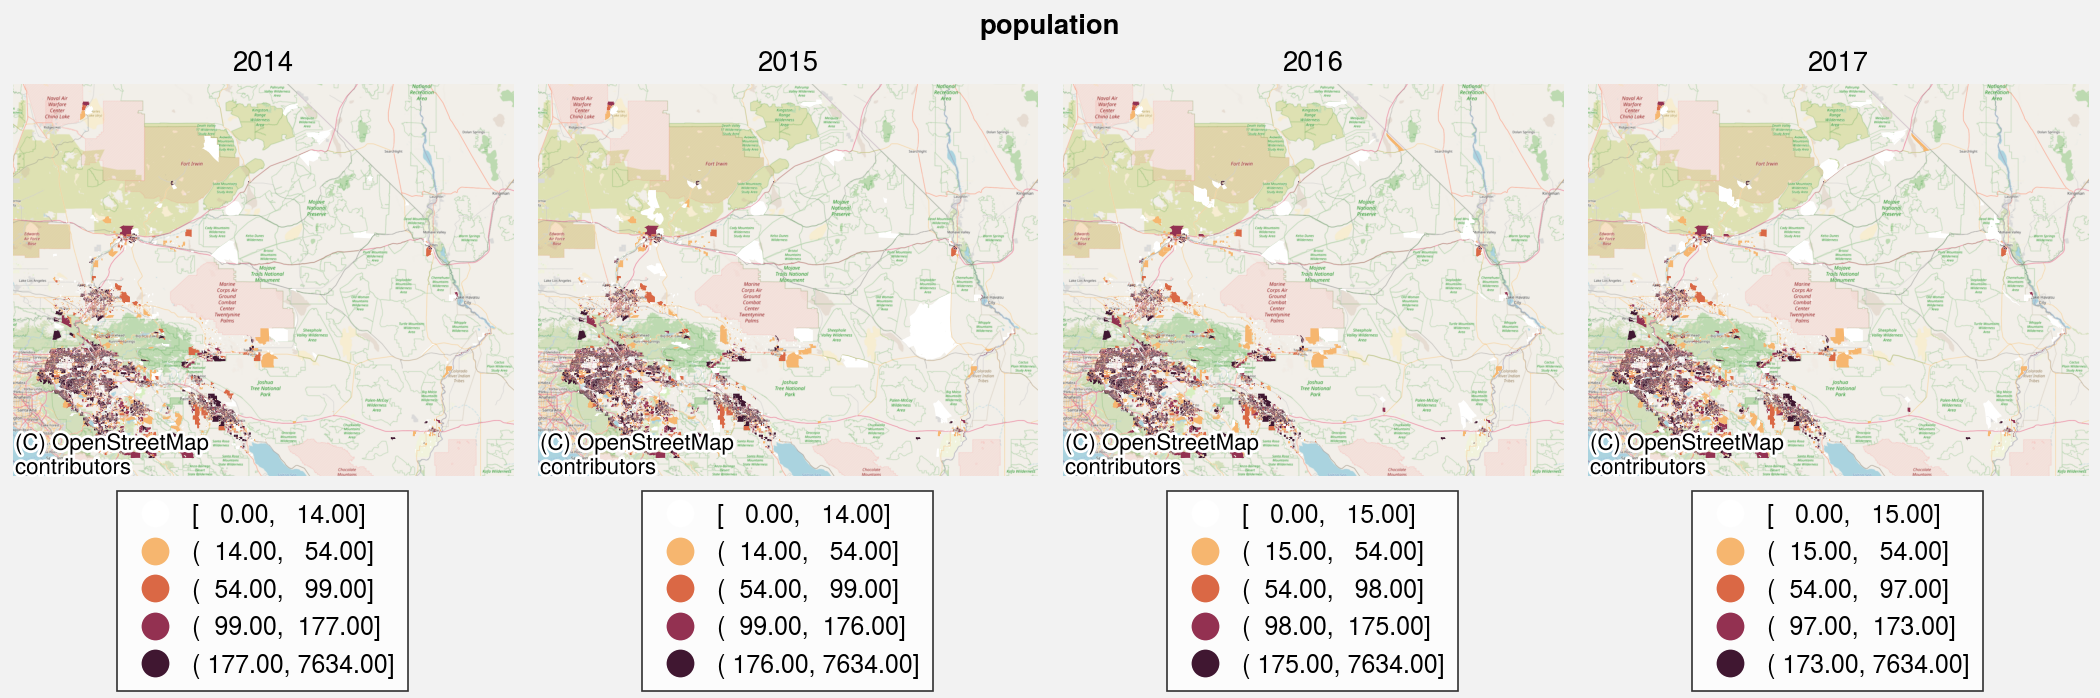

In [3]:
#fast and easy time series plot
rv.tsplot('population')

`tsplot` default behavior is to graph every year in the provided `Community` object in chronological order with OpenStreetMaps.Mapnik from contextily as the basemap. If you pass the list `years=[]` , then `tsplot` will graph in the order that the list was passed. You can also specify another map provider for contextily, or disable it by passing `False` with the parameter`ctxmap`.

SubplotsContainer([CartesianAxesSubplot(0.0353415,0.37052;0.275388x0.560698), CartesianAxesSubplot(0.36383,0.37052;0.275388x0.560698), CartesianAxesSubplot(0.692318,0.37052;0.275388x0.560698)])

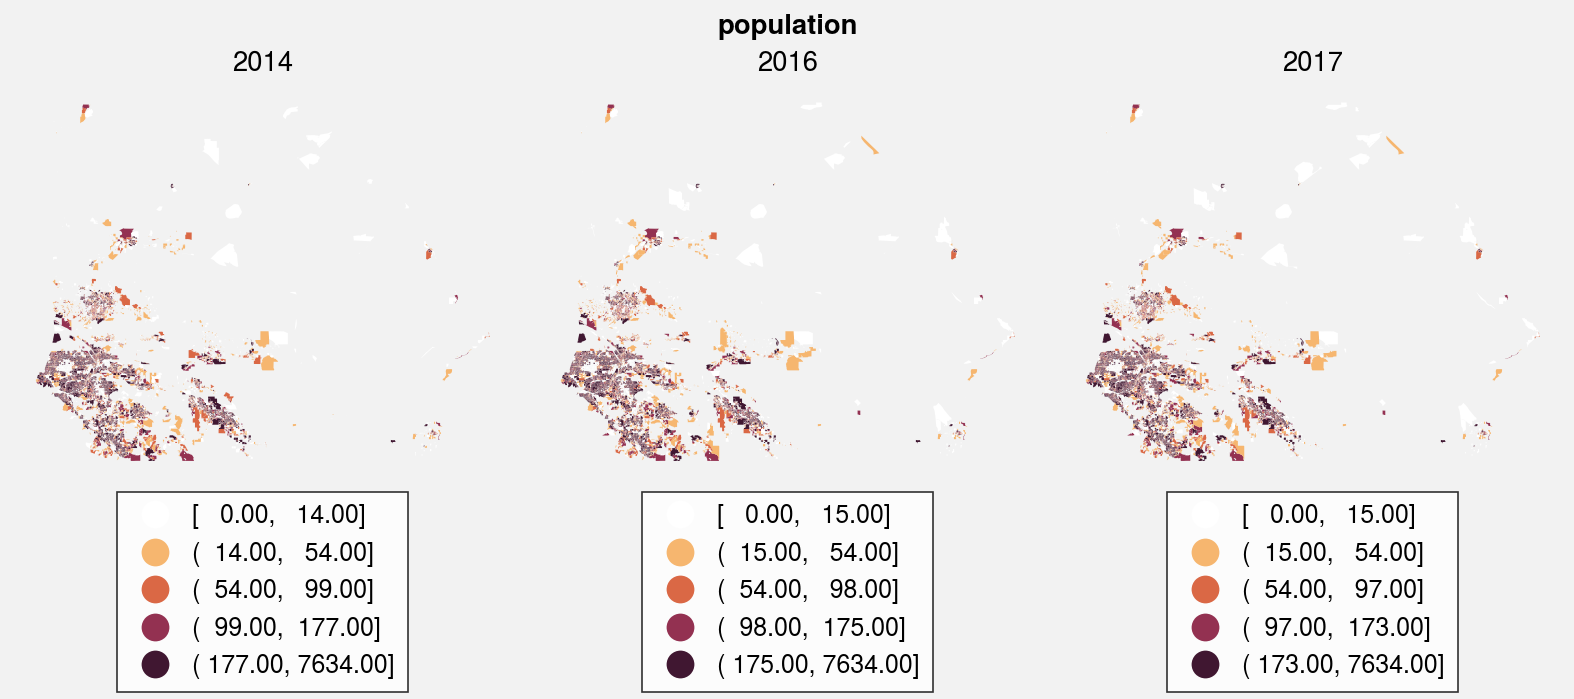

In [4]:
rv.tsplot('population',years=[2014,2016,2017],ctxmap=False)

`tsplot` also offers a significant amount of customization. It is able to handle `maplotlib` arguments, as well as schemes from `mapclassify`. We'll illustrate using census data from the state of California.

In [5]:
#create a community object from CA census data, which spans from 1990-2010
ca = Community.from_census(state_fips='06')

/home/andrew/anaconda3/envs/geosnap/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


SubplotsContainer([CartesianAxesSubplot(0.00480308,0.331937;0.192123x0.58308), CartesianAxesSubplot(0.338136,0.331937;0.192079x0.58308), CartesianAxesSubplot(0.67147,0.331962;0.192123x0.583031)])

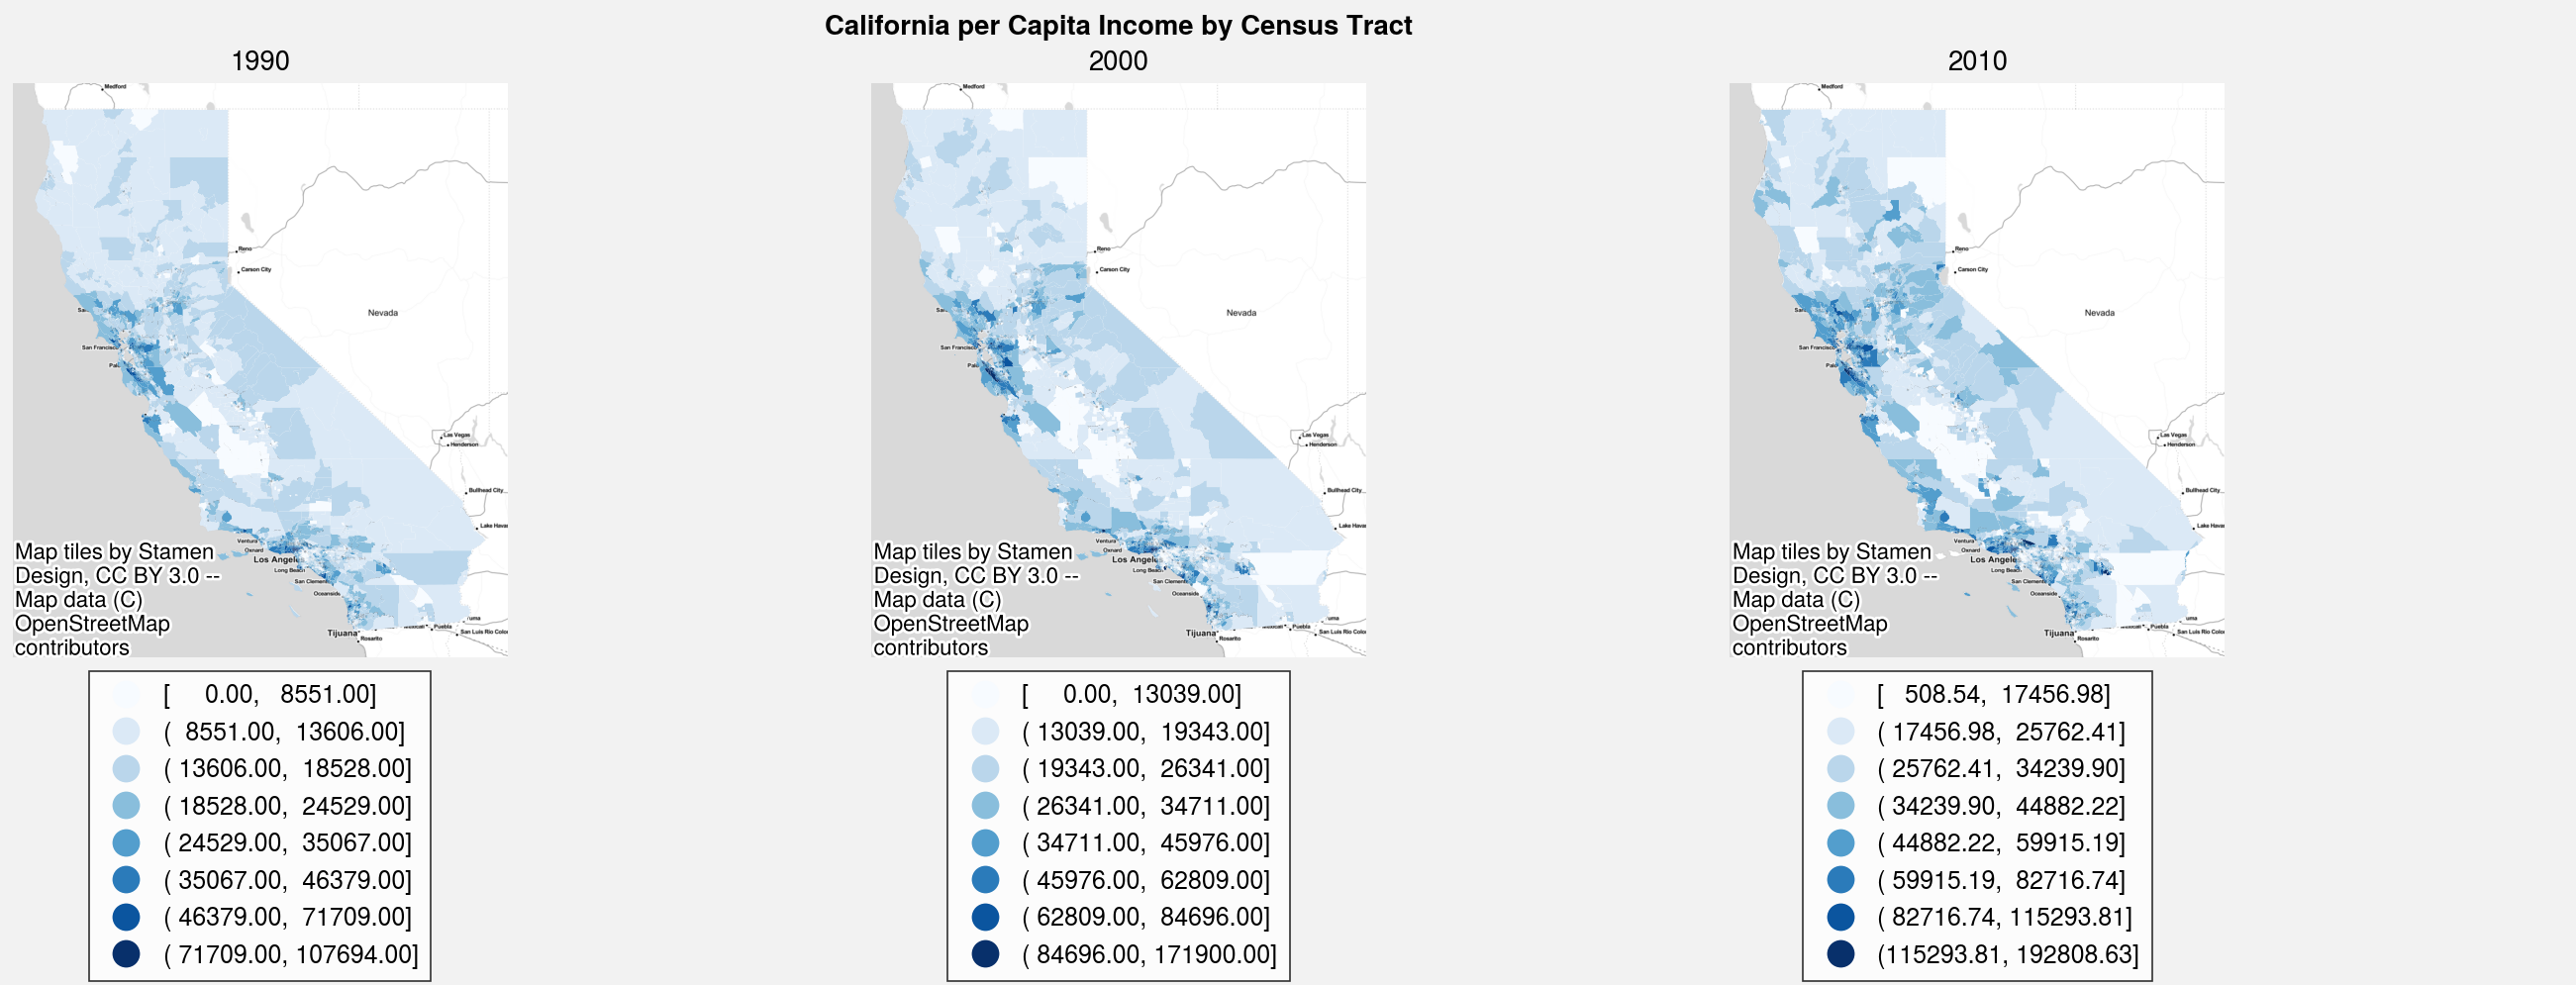

In [6]:
ca.tsplot('per_capita_income',cmap='Blues',scheme='fisherjenkssampled', k=8,
          title='California per Capita Income by Census Tract',
          ctxmap=ctx.providers.Stamen.TonerLite, save_fig='CAPerCapitaIncome.png')

The resulting figure is of California Income per Capita by census tract in the 'Blues' choropleth style, with the title 'California per Capita Income by Census Tract'.

The `save_fig` parameter in `tsplot` tells the function to save the resulting plot with the specified name and path. Note that if the file extension is not specified then the image will be saved as a `.pdf`, and that the path specified must already exist.